## Nombre : Josue Alejandro Sauca Pucha
## Fecha : 23-06-2023

## Tema: Creación de clusters utilizando K-means
### Objetivos:
    1. Utilizar K-meas para realizar una agrupación de datos no supervisados.
    2. Determinar cuál es el número de cluster necesarios para la agrupación de los datos.
    3. Realizar predicciones con datos nuevos.
### Instrucciones
    1. Descargue los dataset train y test desde el EVA.
    2. Realice las tareas señaladas en la sección actividades.
    3. Suba el archivo .ipynb al eva
    
## Actividades a desarrollar
    1. Con el archivo denominado train realice un análisis exploratorio de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [8]:
d_train = pd.read_csv("train.csv")
d_train

,V1,V2,V3,V4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
142,6.7,3.0,5.2,2.3
143,6.3,2.5,5.0,1.9
144,6.5,3.0,5.2,2.0
145,6.2,3.4,5.4,2.3


In [12]:
#Vemos los datos nulos del dataset
d_train.isnull().sum()

V1    0
V2    0
V3    0
V4    0
dtype: int64

In [13]:
d_train.describe()

,V1,V2,V3,V4
count,147.000000,147.000000,147.000000,147.000000
mean,5.845578,3.049660,3.762585,1.199320
std,0.833316,0.426739,1.767988,0.760092
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
X = np.array(d_train[['V1','V2','V3','V4']])
X.shape

(147, 4)

D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

TypeError: hist() missing 1 required positional argument: 'x'

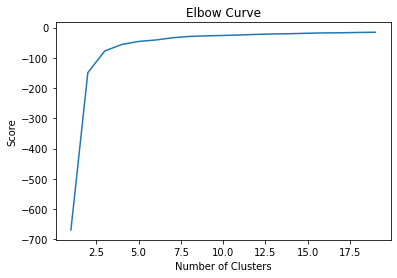

In [130]:
"""
Como se puede observar la tecnica del codo se puede apreciar el corte en el punto 2
"""
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

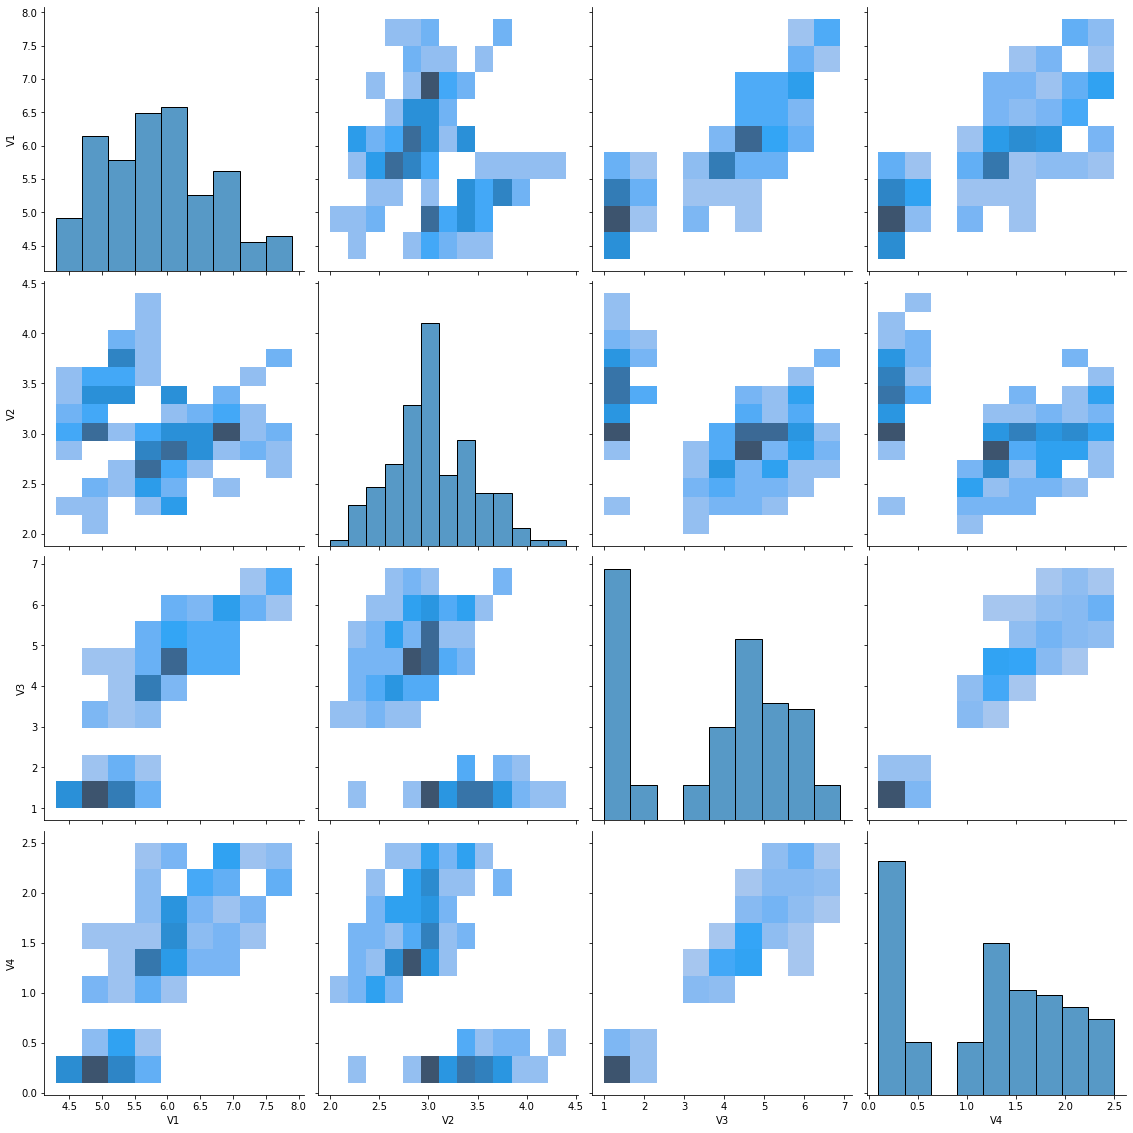

In [132]:
"""
Se puede corrobarar el valor de 2 en las siguientes gráficas ya que existen 2 grupos separados
en el dataset enviado
"""
sb.pairplot(d_train.dropna(),height=4,vars=["V1","V2","V3","V4"],kind='hist')

In [74]:
"""
Luego de obtener el valor del cluster obtenido con la tecnica del codo y 
corrobarado con las previas gráficas se obteniede el siguiente centroide
"""
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
# Predicting the clusters
labels1 = kmeans.predict(X)
colores=['blue','red']

D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[5.00192308 3.34615385 1.56346154 0.29230769]
 [6.30736842 2.88736842 4.96631579 1.69578947]]


In [75]:
labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [122]:
"""
Se le asigna una nueva fila con el  numero del cluster que le toca a 
cada uno
"""
d_train['Numero Cluster'] = labels1

In [123]:
d_train

,V1,V2,V3,V4,Numero Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,1
143,6.3,2.5,5.0,1.9,1
144,6.5,3.0,5.2,2.0,1
145,6.2,3.4,5.4,2.3,1


In [76]:
"""
Como se puede observar la agrupacion con el numero 1 estan con una representación de color red y una cantidad 52
en cambio 0 esta representada con color blue y una cantidad de 95 
"""
copy =  pd.DataFrame()
copy['label'] = labels1;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,52
1,red,95


In [124]:
#Se crea un nuevo dataset con los valores de train
d_train.to_csv('nuevo_train.csv')

In [125]:
#Mostrara las 10 filas del nuevo archivo creado
!head -n 10 nuevo_train.csv

,V1,V2,V3,V4,Numero Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0


In [115]:
d_test = pd.read_csv("test.csv",header=None)
d_test

,0,1,2,3
0,5.2,4.1,1.5,0.1
1,5.6,2.5,3.9,1.1
2,6.4,3.2,5.3,2.3


[0 1 1]


<ipython-input-116-c59b87998d12>:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


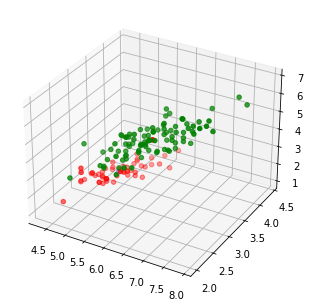

In [116]:
from mpl_toolkits.mplot3d import Axes3D
# Predicting the clusters
labels = kmeans.predict(d_test)
# Getting the cluster centers
colores1=['red','green','blue']
C = kmeans.cluster_centers_
print(labels)
asignar=[]
for row in labels1:
    asignar.append(colores1[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], c=colores)

In [117]:
"""
Como se puede observar la fila 1 pertenece al grupo 0 de color blue
Las fila 2 y 3 pertenecen al grupo 1 color red
"""
print(labels)

[0 1 1]


In [126]:
#Se le asigna la nueva columna al dataset de test
d_test['Columna Agrupacion'] = labels

In [127]:
d_test

,0,1,2,3,Columna Agrupacion
0,5.2,4.1,1.5,0.1,0
1,5.6,2.5,3.9,1.1,1
2,6.4,3.2,5.3,2.3,1


In [128]:
#Se almacena un nuevo archivo con los datos de test
d_test.to_csv('nuevo_test.csv')

In [129]:
#Mostrara las 10 filas del nuevo archivo creado
!head -n 10 nuevo_test.csv

,0,1,2,3,Columna Agrupacion
0,5.2,4.1,1.5,0.1,0
1,5.6,2.5,3.9,1.1,1
2,6.4,3.2,5.3,2.3,1


# Preguntas de control
    1. Cuál creee Usted que es el número correcto de clusters que se debe utilizar en el problema, explique el porqué.

El número correcto de cluster que se utilizo para el próblema fue de **2**, esto se dio luego de aplicar el método del codo el cúal permitio ver la curva de corte en la sección de **2 cluster**, tambien se corroboro con las gráficas de dispersión las cuales agrupaban en un conjunto de dos pares entonces esos datos fueron los elegidos para el problema. 